### Nama             : Rofika Nur 'Aini
### NIM              : 2041720099
### Kelas / No. Urut : TI-3B / 23

## Tugas

Buatlah sebuah model KMeans dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model KMeans dengan mempertimbangkan jumlah $k$ yang terbaik.

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/JS12_KMeans/data/Mall_Customers.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


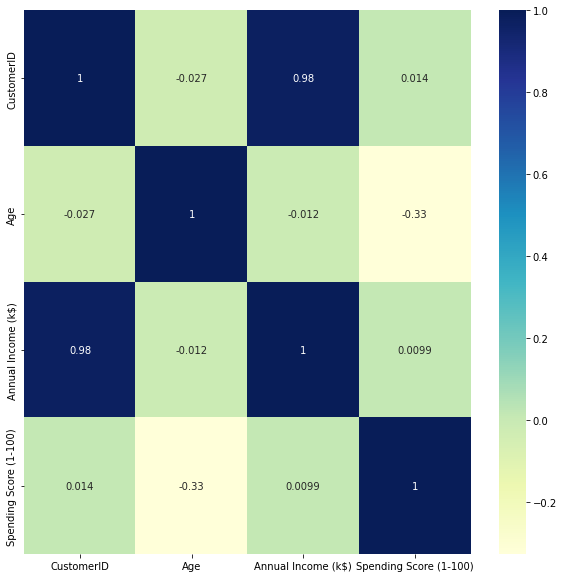

In [3]:
#mengecek korelasi antar fitur
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari gambar di atas, dapat disimpulkan bahwa fitur-fitur yang memiliki korelasi kuat, di antaranya: 
a. CustomerID dan AnnualIncome
b. AnnualIncome dan SpendingScore
karena CustomerID sebagai penomoran atau data unik setiap baris data, maka fitur AnnualIncome dan SpendingScore yang digunakan untuk clustering.

In [4]:
# Seleksi Fitur

x = df.iloc[:, [3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Mempertimbangkan Nilai K

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

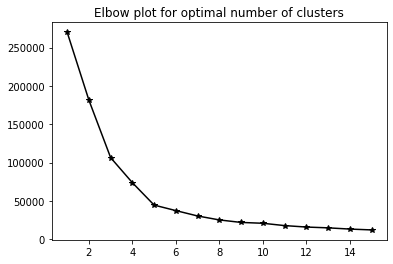

In [5]:
sse = []
for i in range(1,16): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)  

plt.plot(range(1,16),sse,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

Dari plot nilai SSE dengan metode elbow, diketahui bahwa nilai $k=5$ merupakan jumlah cluster terbaik

In [6]:
#membagi data menjadi 5 cluster sesuai nilai k
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
k_means.fit(x)

KMeans(n_clusters=5)

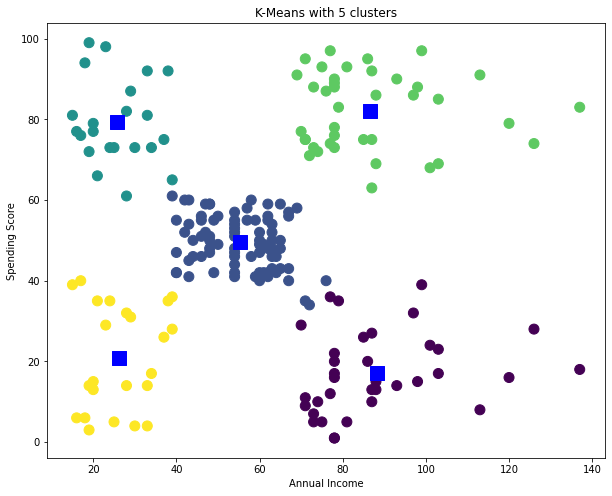

In [7]:
centers = k_means.cluster_centers_
plt.figure(figsize=(10, 8))

plt.scatter(x['Annual Income (k$)'], 
            x['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 5 clusters')

plt.show()

In [10]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959593
k=3; SSE=106348.37306211122
k=4; SSE=73679.78903948836
k=5; SSE=44448.4554479337
k=6; SSE=37265.86520484346
k=7; SSE=30259.65720728547
k=8; SSE=25095.70320999756
k=9; SSE=21830.041978049434
k=10; SSE=20736.679938924128
k=11; SSE=17702.59593229628
k=12; SSE=15810.838613705502
k=13; SSE=14763.330402558204
k=14; SSE=13165.329070181628
k=15; SSE=12064.939000692291
